In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import scipy.fftpack
from cycler import cycler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib notebook

In [3]:
plt.rc('axes', labelsize=14)  
plt.rc('axes', titlesize=14)  
plt.rc('legend', fontsize=12)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [4]:
k = np.array([ 1.25490065,  2.21889643,  3.12069761,  4.06321762,  5.10060204,
        6.11964544,  7.0710866 ,  8.02398127,  9.05750897, 10.09414547,
       11.06141803, 12.02924793, 13.04405384, 14.05359264, 15.0161363 ,
       16.00466781, 17.03313867, 18.05367807, 19.03714426, 20.01832746,
       21.03123181, 22.03616902, 23.02225023, 24.00924858, 25.01533575,
       26.02906229, 27.02879804, 28.02743661, 29.02975943, 30.02478557,
       31.02092077, 32.01280891, 33.00754737, 34.01740413, 35.01961349,
       36.01600225, 37.01945599, 38.02050755, 39.0126108 , 40.00777367,
       41.01563757, 42.02027657, 43.01807753, 44.01620491, 45.02000711,
       46.01917087, 47.00661047, 48.00230524, 49.00997054, 50.01863007,
       51.01662291, 52.01423117, 53.01856599, 54.01797481, 55.01028252,
       56.00366543, 57.00991691, 58.01379928, 59.00887264, 60.01014577,
       61.01345756, 62.01485699])

In [5]:
spherical_coef = np.array([1.52224727, 1.67217683, 2.14703134, 1.71460726, 1.72978027,
       1.9208626 , 1.957389  , 1.99772016, 1.70400959, 1.9608113 ,
       2.00987959, 1.93240073, 1.88714434, 1.91949091, 2.09424974,
       1.86601054, 1.90185374, 1.91304235, 2.03585799, 1.95715696,
       1.8976666 , 1.9935114 , 1.97464515, 1.99169897, 1.9174885 ,
       1.94158904, 1.9901228 , 1.94586076, 1.97538127, 1.98292126,
       1.96021841, 2.01317291, 1.95446652, 1.94172791, 1.99909998,
       1.95426184, 1.98198394, 1.96234526, 2.01472796, 1.96253378,
       1.9485838 , 1.99662435, 1.95928553, 2.00332567, 1.94171937,
       2.01656501, 1.99690196, 1.97178747, 1.96243   , 1.96140384,
       2.00837827, 1.96554706, 1.97504445, 1.9944485 , 1.99965746,
       1.98886296, 1.95408574, 1.99487705, 1.99428894, 1.96407426,
       1.99055781, 1.97443649])

In [6]:
spec_vel_e1 = np.array([1.86824706e+06, 1.08515110e+06, 4.55064054e+05, 3.57187468e+05,
       2.20958839e+05, 1.41236114e+05, 1.05545506e+05, 8.36629640e+04,
       7.37920654e+04, 5.10244289e+04, 4.18010287e+04, 3.72728975e+04,
       3.22110520e+04, 2.71732889e+04, 2.22327256e+04, 2.19652284e+04,
       1.92339339e+04, 1.67754628e+04, 1.42791439e+04, 1.33710266e+04,
       1.25500531e+04, 1.08119459e+04, 1.00267143e+04, 9.14312014e+03,
       8.75572427e+03, 8.05644885e+03, 7.22301840e+03, 6.86145790e+03,
       6.30536922e+03, 5.89765939e+03, 5.59507088e+03, 5.10090540e+03,
       4.93943095e+03, 4.69446812e+03, 4.30387062e+03, 4.15693548e+03,
       3.86802678e+03, 3.72084366e+03, 3.42913574e+03, 3.34601271e+03,
       3.22366375e+03, 2.99052109e+03, 2.90526171e+03, 2.71559446e+03,
       2.67805677e+03, 2.44794050e+03, 2.33016754e+03, 2.18930661e+03,
       2.00352354e+03, 1.79898786e+03, 1.55671352e+03, 1.38650652e+03,
       1.18549510e+03, 9.94789352e+02, 8.29183889e+02, 6.86573573e+02,
       5.64985242e+02, 4.41575362e+02, 3.47725014e+02, 2.73009569e+02,
       2.05231985e+02, 1.55487002e+02])

In [7]:
spec_vel_e05 = np.array([4.09353922e+05, 2.38190937e+05, 1.27172228e+05, 1.24667525e+05,
       8.80456947e+04, 6.11551216e+04, 4.94772846e+04, 3.92351421e+04,
       3.96660221e+04, 2.92660370e+04, 2.50095942e+04, 2.28136139e+04,
       2.07381957e+04, 1.80869508e+04, 1.52370338e+04, 1.54731010e+04,
       1.38574441e+04, 1.26157603e+04, 1.10148037e+04, 1.06359193e+04,
       1.01927797e+04, 9.08552959e+03, 8.45376190e+03, 7.95182552e+03,
       7.72105190e+03, 7.21202692e+03, 6.67758913e+03, 6.41405085e+03,
       6.02160189e+03, 5.72235637e+03, 5.49181946e+03, 5.12051598e+03,
       5.01903174e+03, 4.82916580e+03, 4.48662683e+03, 4.40170949e+03,
       4.17233887e+03, 4.04748365e+03, 3.79758261e+03, 3.75102136e+03,
       3.64558404e+03, 3.42175998e+03, 3.36912119e+03, 3.18564646e+03,
       3.18338815e+03, 2.94403451e+03, 2.82561988e+03, 2.67797647e+03,
       2.47258799e+03, 2.24905290e+03, 1.96576555e+03, 1.76671854e+03,
       1.52854331e+03, 1.29393071e+03, 1.08774187e+03, 9.08599259e+02,
       7.53524501e+02, 5.94768811e+02, 4.72143057e+02, 3.73752324e+02,
       2.83834712e+02, 2.16571939e+02])

In [8]:
spec_vel_e43 = np.array([5.11394157e+06, 2.73941142e+06, 9.41041946e+05, 8.41387812e+05,
       4.72435289e+05, 2.79252756e+05, 1.92327627e+05, 1.42916790e+05,
       1.25575848e+05, 8.58456695e+04, 6.90132954e+04, 5.76464125e+04,
       4.89131442e+04, 4.05243268e+04, 3.21052962e+04, 3.10449742e+04,
       2.63962579e+04, 2.28942449e+04, 1.89081279e+04, 1.75687543e+04,
       1.60984552e+04, 1.37609693e+04, 1.25092020e+04, 1.13114507e+04,
       1.06607161e+04, 9.62182296e+03, 8.57050812e+03, 8.06850982e+03,
       7.32156092e+03, 6.71663339e+03, 6.32220096e+03, 5.71236556e+03,
       5.45333601e+03, 5.16001774e+03, 4.66410347e+03, 4.45812735e+03,
       4.13543506e+03, 3.92316090e+03, 3.60397113e+03, 3.49294701e+03,
       3.31516786e+03, 3.05410952e+03, 2.94765219e+03, 2.73231999e+03,
       2.67974555e+03, 2.43982014e+03, 2.30149925e+03, 2.14060996e+03,
       1.94490284e+03, 1.73603652e+03, 1.49251006e+03, 1.32050881e+03,
       1.12320371e+03, 9.37192667e+02, 7.75812063e+02, 6.37488466e+02,
       5.22842902e+02, 4.05486837e+02, 3.17329167e+02, 2.48173542e+02,
       1.85589590e+02, 1.39575717e+02])

<IPython.core.display.Javascript object>


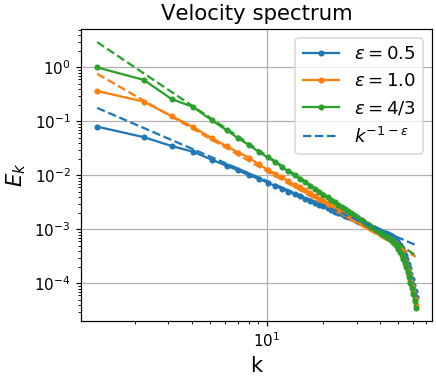

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3.5),constrained_layout=True)
ax.plot(k, spec_vel_e05*spherical_coef/np.max(spec_vel_e43*spherical_coef), '.-', label=r'$\epsilon=0.5$', color=colors[0])
ax.plot(k, spec_vel_e1*spherical_coef/np.max(spec_vel_e43*spherical_coef), '.-', label=r'$\epsilon=1.0$', color=colors[1])
ax.plot(k, 1.2*k**(-1-1), '--', color=colors[1])
ax.plot(k, spec_vel_e43*spherical_coef/np.max(spec_vel_e43*spherical_coef), '.-', label=r'$\epsilon=4/3$', color=colors[2])
ax.plot(k, 5*k**(-1-4/3), '--', color=colors[2])
ax.plot(k, 0.25*k**(-1-0.5), '--', color=colors[0], label=r'$k^{-1-\epsilon}$')
ax.set(xscale='log', yscale='log', title='Velocity spectrum', xlabel='k', ylabel=r'$E_k$'); ax.grid()
ax.legend(loc='best')

# pp = PdfPages('Images/Scalar/vel_spec.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()